# BINA Case Studiy - FS22

## Bike Sharing Economie als zukunftssicherer Markt in der Stadt von Morgen

Um in Zukunft die Co2 Bilanz der Metropolen gegen Null zu reduzieren, wird auf das Zwei-rad gesetzt und laufend in der Erweiterung der Infrastruktur mit eingeplant. So gehört die Mobilität der Zukunft innerhalb der Städte dem Fahrrad. Die Verwendung von Fahrrädern als Mittel zum Pendeln, insbesondere für kurze Strecken, ist keine neue Idee. In den letz-ten Jahren hat das Fahrradfahren im Hinblick auf die Gesundheit im Besonderen während der Corona-Zeit sowie dem Bewusstsein des Klimawandels an Bedeutung gewonnen. An-statt ein Fahrrad zu kaufen und zu unterhalten, leihen immer mehr Bürger Fahrräder aus, damit sie es bei Bedarf dort nutzen können, wo sie es gerade benötigen. Aus diesem Grund bekommt der Sharing Economy Markt immer einen grösseren Stellenwert. So schaffen diese beiden Trends einen grossen Markt, der gesättigt werden soll. Aus diesem Grund möchten wir einen Datensatz von Leihfahrrädern in einer Europäi-schen/amerikanischen Stadt analysieren und Prognosen zur Nutzung darstellen.

### Studierende
- Yannik Wiederkehr
- Nicolas Feuchter
- Christian Heusser
- Stefan Ilic

### Fragestellungen
- Welches Nutzungsmuster kann aus dem Datensatz der ausgeliehenen Fahrräder in den Jahren X bis Y bestimmt werden.
- Hat das Wetter (Temperatur, Windgeschwindigkeit, Regen, etc.) einen Einfluss auf die Nutzung des Fahrrad-Leihsystems
- Ist es möglich ein stündliches Ausleihungsmodell zu bestimmen
- An welchen Wochentagen ist die Nachfrage besonders hoch
- Zu welchen Jahreszeiten wird das Ausleihsystem besonders genutzt
- Vorgehensmodell bestimmen beispielsweise Lineare Regression, Zeitreihenanaly-se, Regression Trees und Random Forest

### Dataset
**Dataset name:** London bike sharing dataset
**Source:** Kaggle [London bike sharing dataset](https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset)

#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**weather_code" category description:**

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog




## Packete und Bibliotheken installieren

In [1]:
install.packages("corrplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [8]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Notwendige Libraries laden

In [10]:
library(tidyverse)
library(purrr)
library(RColorBrewer)
library(scales)
library(readr)
library(tidyr)
library(dplyr)
library(corrplot)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


corrplot 0.92 loaded



### Datenset Bike Sharing laden und unter der Variable "bike_data" abspeichern

In [24]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")

### Datenset anzeigen

In [25]:
bike_data

instant,date,time,hr,month,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,04.01.2015,00:00:00,0,1,182,3.0,2.0,93.0,6.0,3,0,1,3
2,04.01.2015,01:00:00,1,1,138,3.0,2.5,93.0,5.0,1,0,1,3
3,04.01.2015,02:00:00,2,1,134,2.5,2.5,96.5,0.0,1,0,1,3
4,04.01.2015,03:00:00,3,1,72,2.0,2.0,100.0,0.0,1,0,1,3
5,04.01.2015,04:00:00,4,1,47,2.0,0.0,93.0,6.5,1,0,1,3
6,04.01.2015,05:00:00,5,1,46,2.0,2.0,93.0,4.0,1,0,1,3
7,04.01.2015,06:00:00,6,1,51,1.0,-1.0,100.0,7.0,4,0,1,3
8,04.01.2015,07:00:00,7,1,75,1.0,-1.0,100.0,7.0,4,0,1,3
9,04.01.2015,08:00:00,8,1,131,1.5,-1.0,96.5,8.0,4,0,1,3


### Datentypen anzeigen

In [3]:
str(bike_data)

'data.frame':	17414 obs. of  14 variables:
 $ instant     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ date        : chr  "04.01.2015" "04.01.2015" "04.01.2015" "04.01.2015" ...
 $ time        : chr  "00:00:00" "01:00:00" "02:00:00" "03:00:00" ...
 $ hr          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ month       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ cnt         : int  182 138 134 72 47 46 51 75 131 301 ...
 $ t1          : num  3 3 2.5 2 2 2 1 1 1.5 2 ...
 $ t2          : num  2 2.5 2.5 2 0 2 -1 -1 -1 -0.5 ...
 $ hum         : num  93 93 96.5 100 93 93 100 100 96.5 100 ...
 $ wind_speed  : num  6 5 0 0 6.5 4 7 7 8 9 ...
 $ weather_code: int  3 1 1 1 1 1 4 4 4 3 ...
 $ is_holiday  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ is_weekend  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ season      : int  3 3 3 3 3 3 3 3 3 3 ...


### Zusammenfassung des Datensets anzeigen

In [4]:
summary(bike_data)

    instant          date               time                 hr       
 Min.   :    1   Length:17414       Length:17414       Min.   : 0.00  
 1st Qu.: 4354   Class :character   Class :character   1st Qu.: 6.00  
 Median : 8708   Mode  :character   Mode  :character   Median :12.00  
 Mean   : 8708                                         Mean   :11.51  
 3rd Qu.:13061                                         3rd Qu.:18.00  
 Max.   :17414                                         Max.   :23.00  
     month             cnt             t1              t2       
 Min.   : 1.000   Min.   :   0   Min.   :-1.50   Min.   :-6.00  
 1st Qu.: 4.000   1st Qu.: 257   1st Qu.: 8.00   1st Qu.: 6.00  
 Median : 7.000   Median : 844   Median :12.50   Median :12.50  
 Mean   : 6.515   Mean   :1143   Mean   :12.47   Mean   :11.52  
 3rd Qu.:10.000   3rd Qu.:1672   3rd Qu.:16.00   3rd Qu.:16.00  
 Max.   :12.000   Max.   :7860   Max.   :34.00   Max.   :34.00  
      hum           wind_speed     weather_code 

### Erklärung zu summary(bike_data)

In der Zusammenfassung werden pro Spalte der kleinste Wert, das erste Quartil, der Median, Mittelwert, das dritte Quartil und der Maximalwert angezeigt. Diese Zusammenfassung hilf, einen ersten Überblick über die Daten und die Werte zu erhalten.

## Vergangenheitsanalyse

### Boxplot Anzahl Ausleihen nach Tageszeit

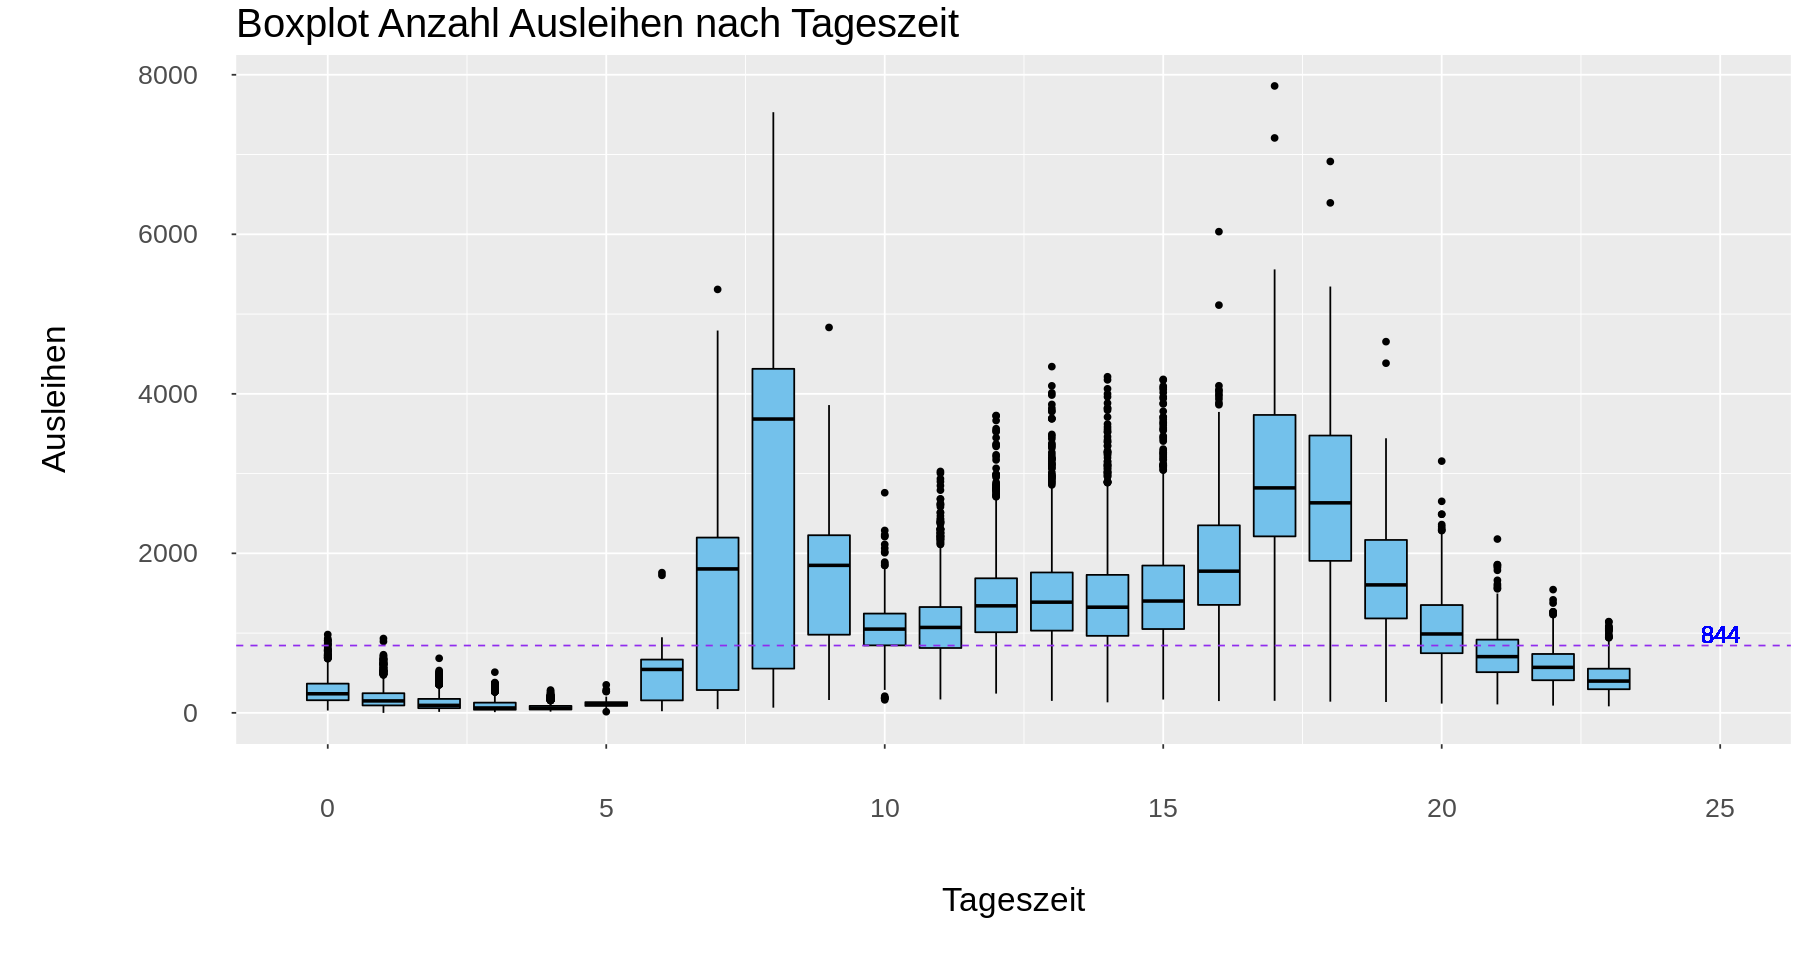

In [33]:
#Median aus Ausleihen berechnen
med <- bike_data$cnt

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit ") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=median(med), y=20), colour="blue", vjust = -4.0, size=5) +

#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )

Aus diesem Histogramm kann abgelesen werden, zu welchen Tageszeiten durchschnittlich am meisten Fahrräder ausgeliehen werden. Es ist zudem auch sichtbar, wie gross die Streuung zu den verschiedenen Uhrzeiten ist.

### Boxplot Anzahl Ausleihen nach Tageszeit am Wochenende

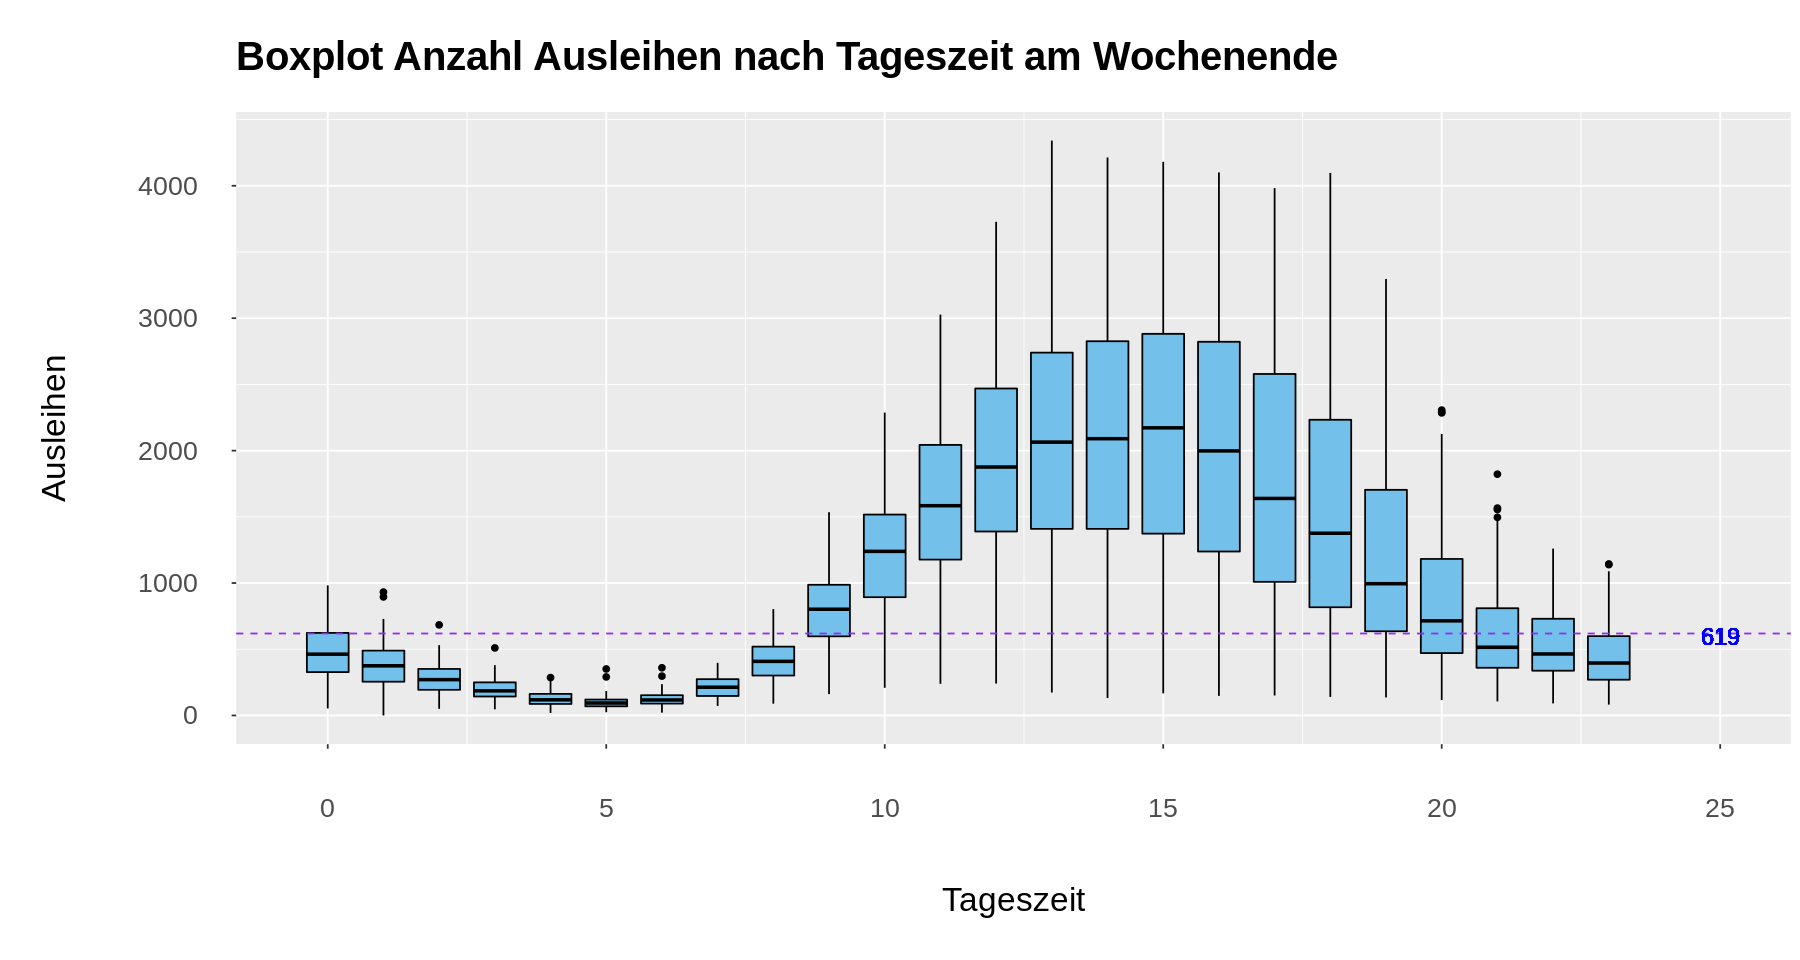

In [32]:
#Filter
filter_bike_data <- bike_data %>% filter(bike_data$is_weekend == 1)

#Median aus Ausleihen berechnen
med <- filter_bike_data$cnt

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit am Wochenende") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=median(med), y=20), colour="blue", vjust = -4.0, size=5) +

#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      plot.title = element_text(face="bold" , margin = margin(t = 20, r = 0, b = 20, l = 0))
      )

### Boxplot Anzahl Ausleihen nach Tageszeit unter der Woche

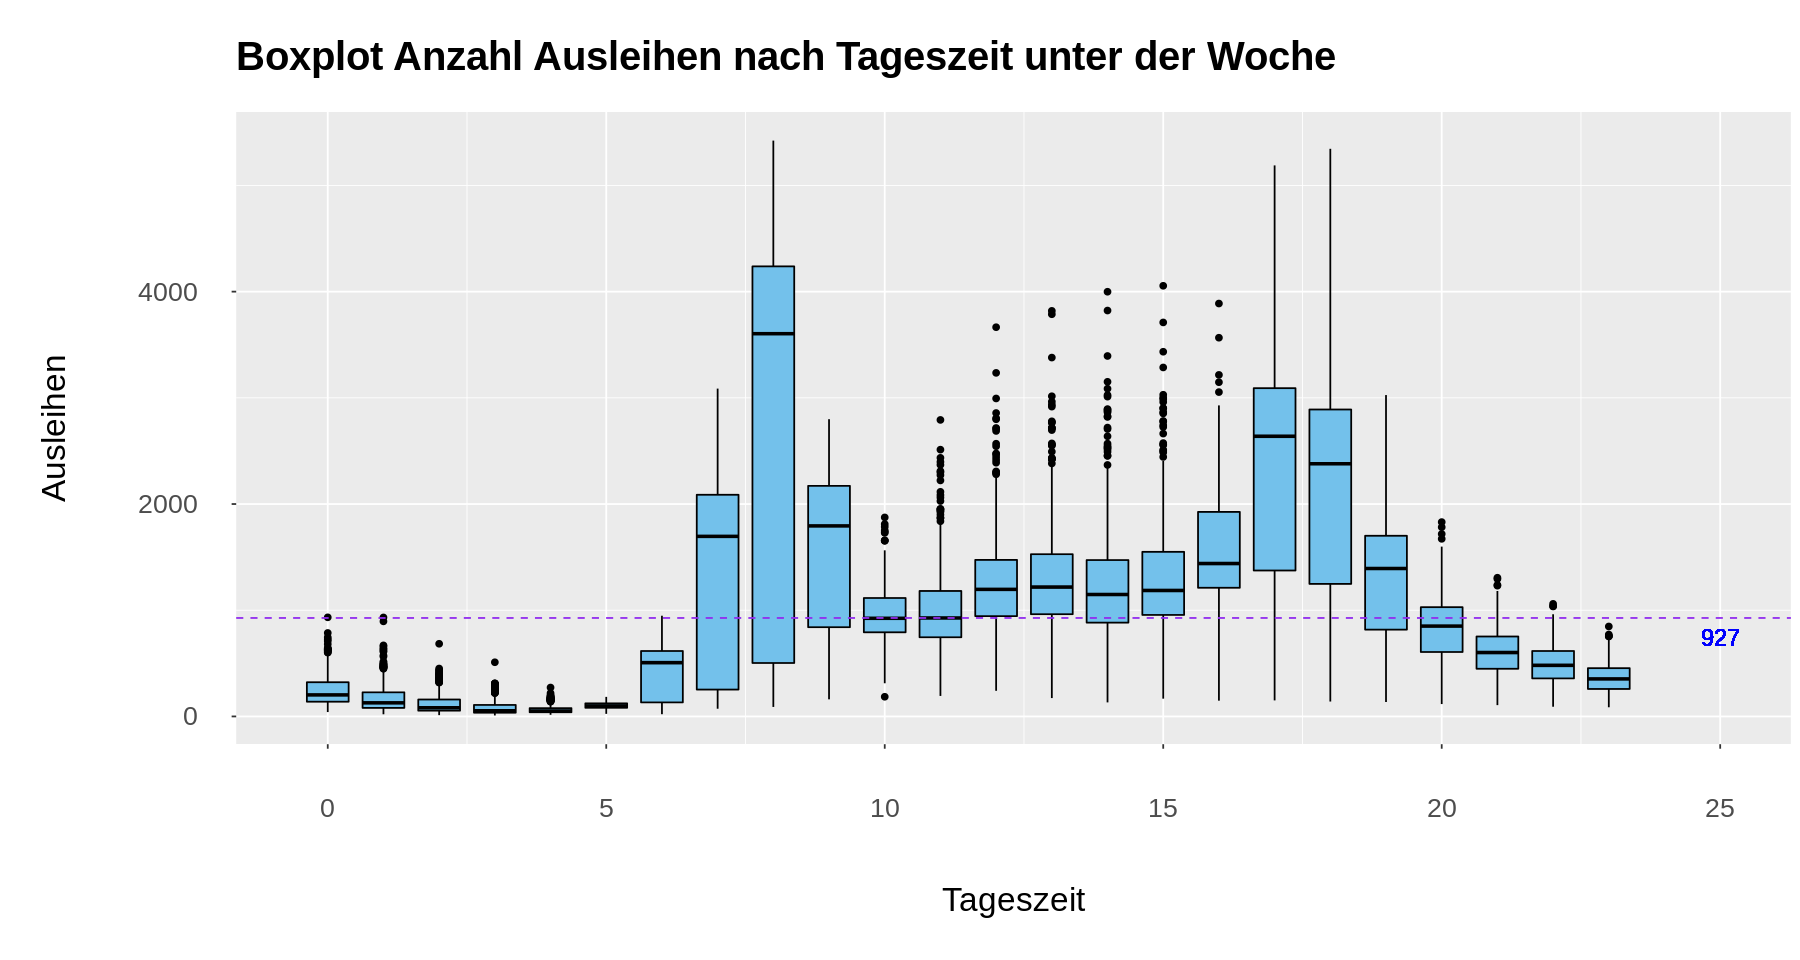

In [31]:
#Filter
filter_bike_data_weekend <- bike_data %>% filter(bike_data$is_weekend == 0)

#Median aus Ausleihen berechnen
med <- filter_bike_data_weekend$cnt

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit unter der Woche") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=median(med), y=20), colour="blue", vjust = -4.0, size=5) +

#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      plot.title = element_text(face="bold" , margin = margin(t = 20, r = 0, b = 20, l = 0))
      )

### Boxplot Anzahl Ausleihen nach Tageszeit an Ferientagen

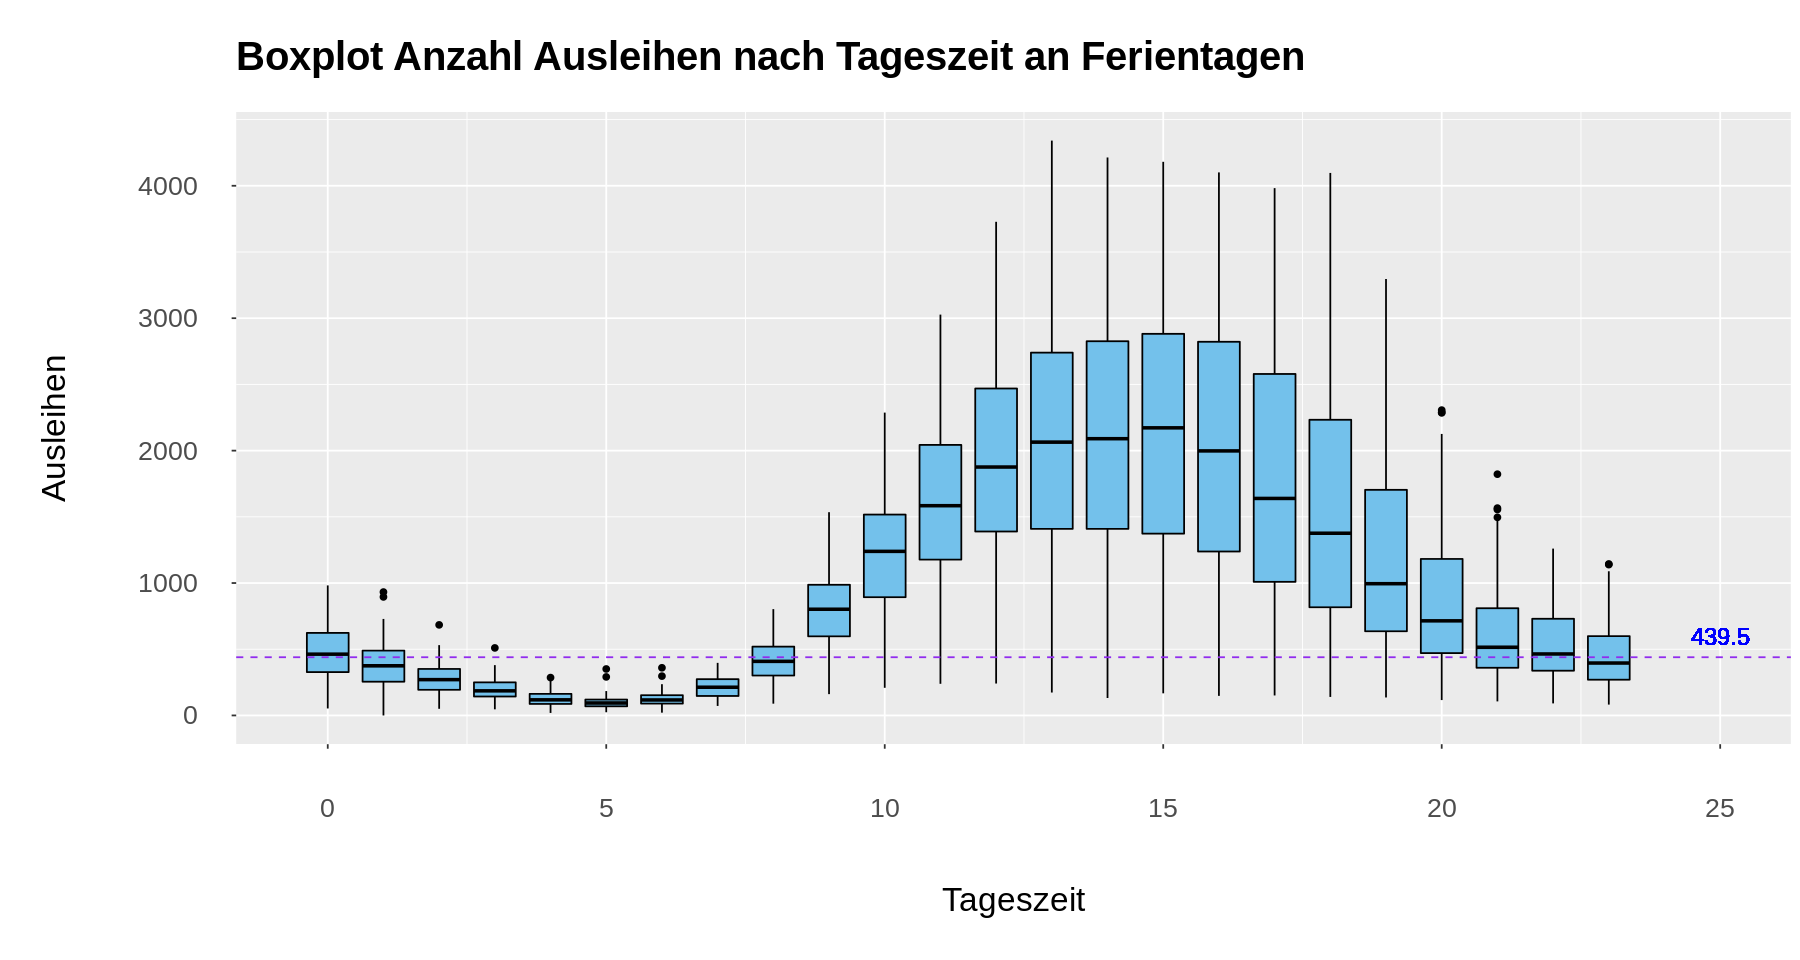

In [27]:
#Filter
filter_bike_data_holiday <- bike_data %>% filter(bike_data$is_holiday == 1)

#Median aus Ausleihen berechnen
med <- filter_bike_data_holiday$cnt

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit an Ferientagen") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=median(med), y=20), colour="blue", vjust = -4.0, size=5) +

#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      plot.title = element_text(face="bold" , margin = margin(t = 20, r = 0, b = 20, l = 0))
      )

### Boxplot Anzahl Ausleihen nach Tageszeit an keinen Ferientagen

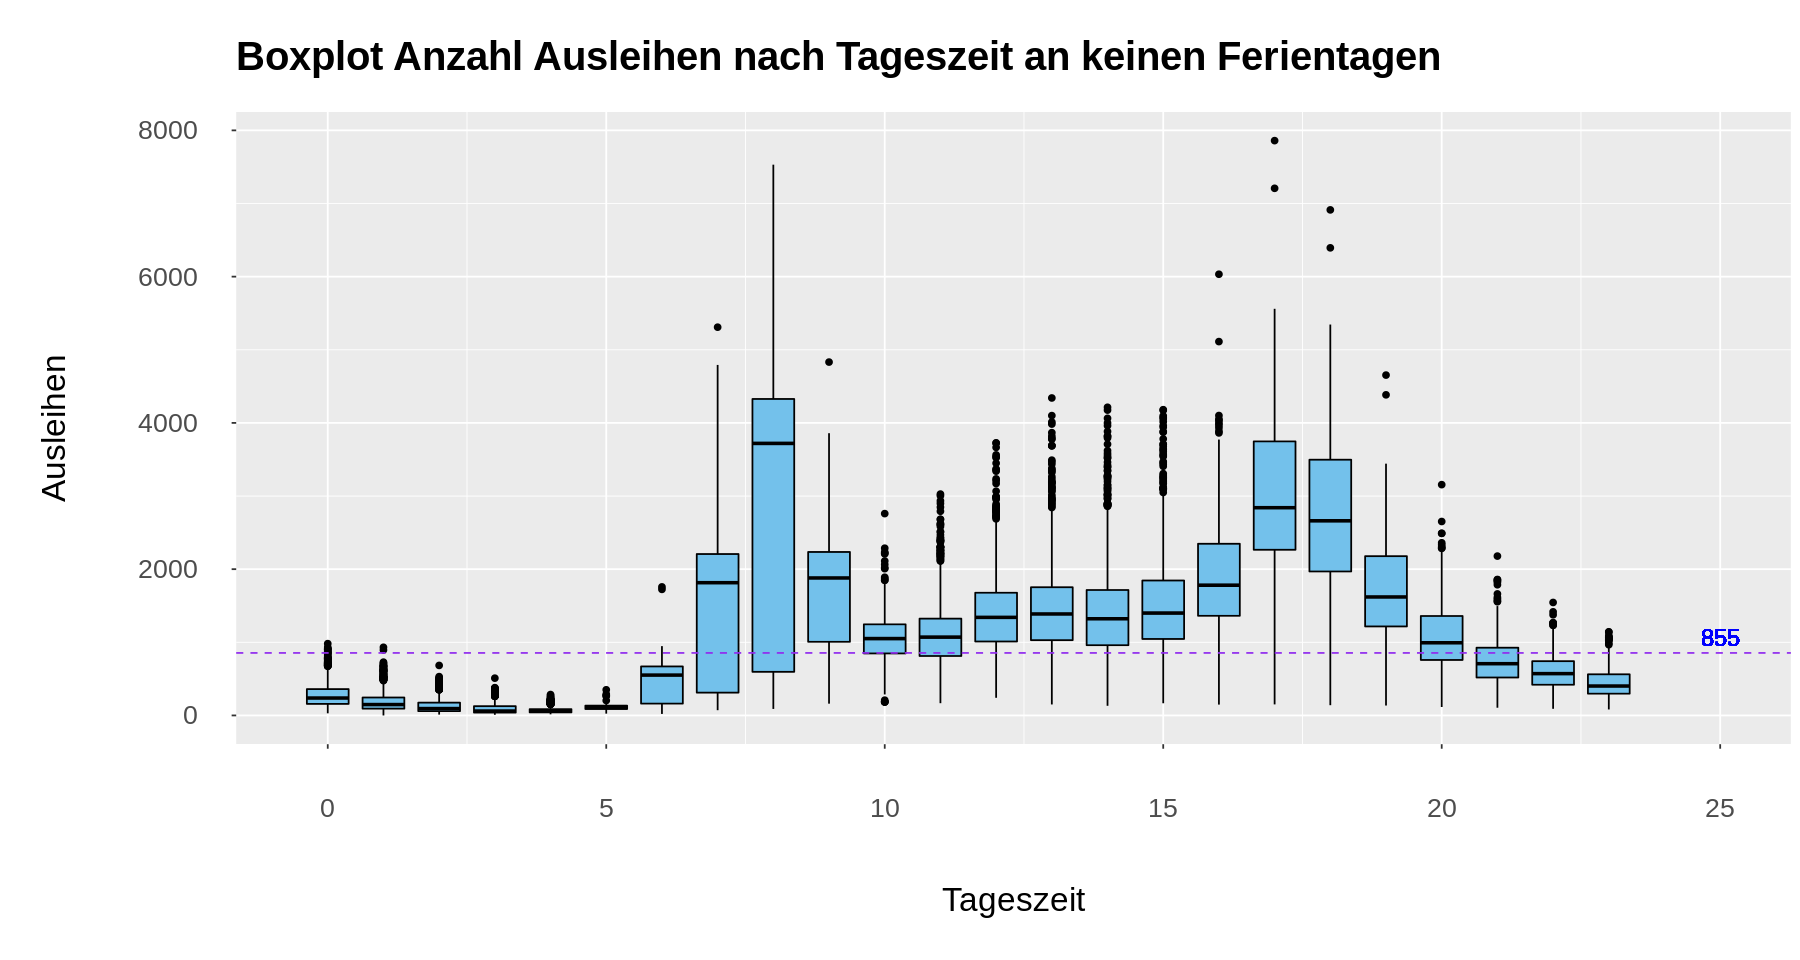

In [28]:
#Filter
filter_bike_data <- bike_data %>% filter(bike_data$is_holiday == 0)

#Median aus Ausleihen berechnen
med <- filter_bike_data$cnt

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit an keinen Ferientagen") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=median(med), y=20), colour="blue", vjust = -4.0, size=5) +

#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      plot.title = element_text(face="bold" , margin = margin(t = 20, r = 0, b = 20, l = 0))
      )



### Boxplot Anzahl Ausleihen nach Tageszeit an keinen Ferientagen

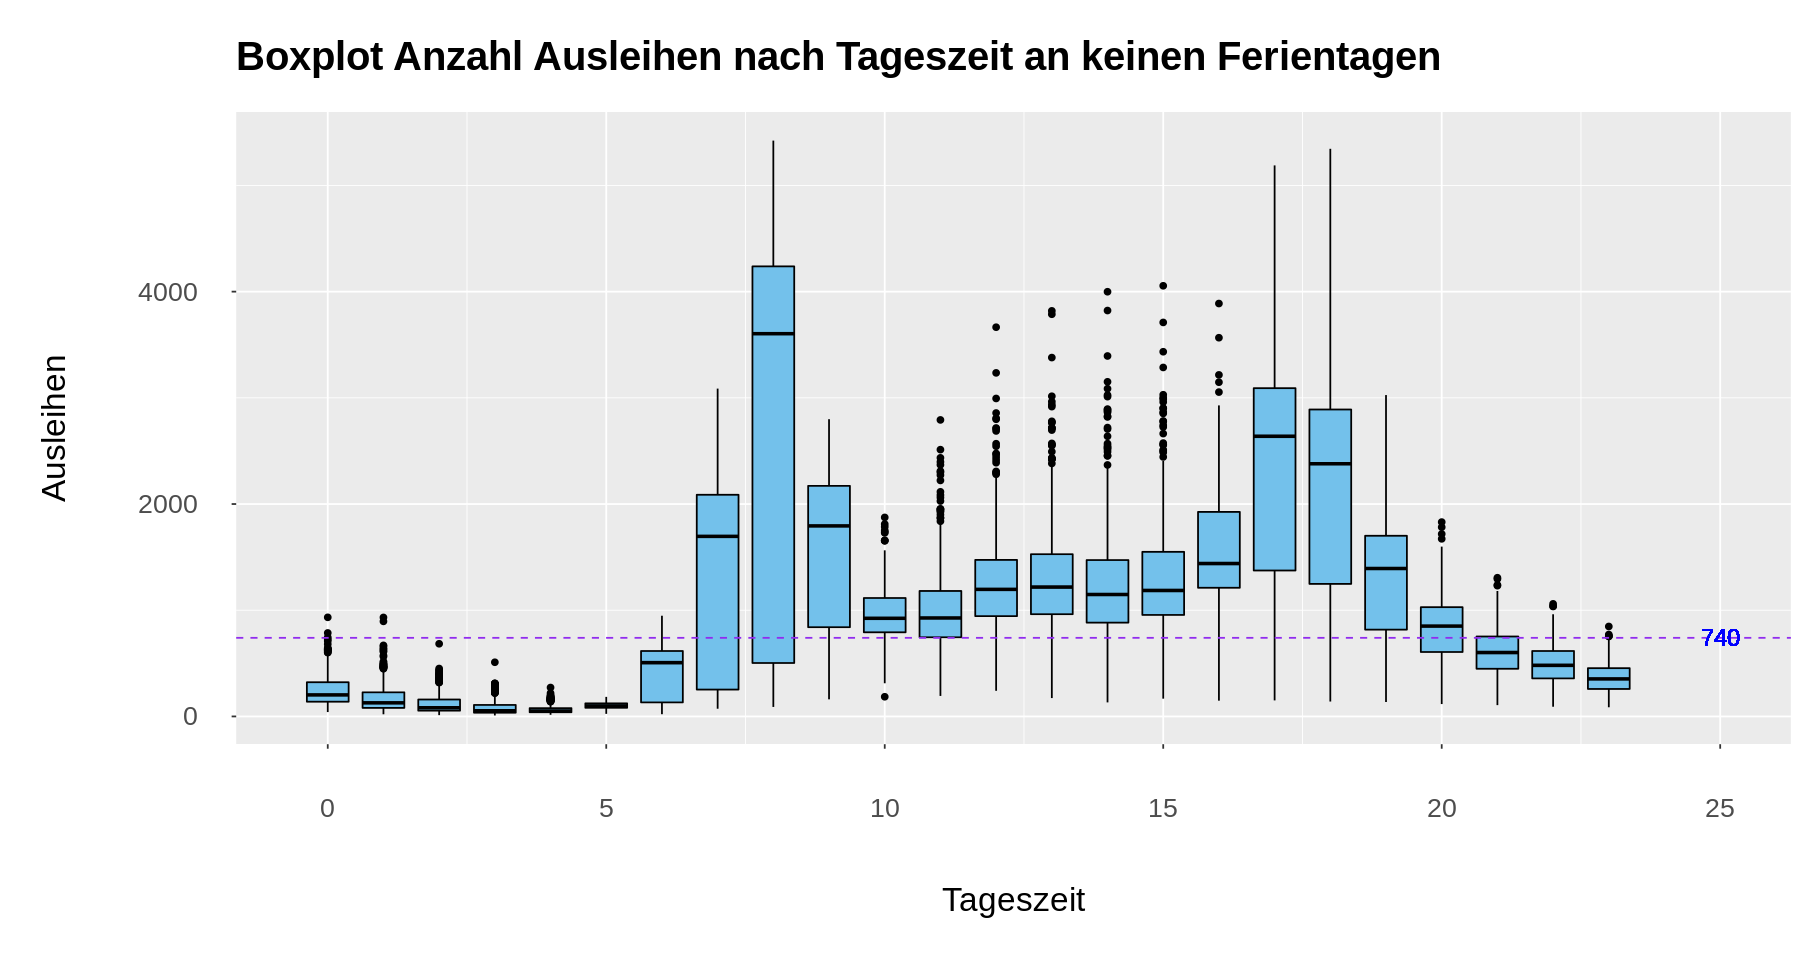

In [29]:
#Filter
filter_bike_data <- bike_data %>% filter(bike_data$season == 2 | bike_data$season == 3)

#Median aus Ausleihen berechnen
med <- filter_bike_data$cnt

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit an keinen Ferientagen") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=median(med), y=20), colour="blue", vjust = -4.0, size=5) +

#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      plot.title = element_text(face="bold" , margin = margin(t = 20, r = 0, b = 20, l = 0))
      )

### Boxplot Anzahl Ausleihen nach Monat

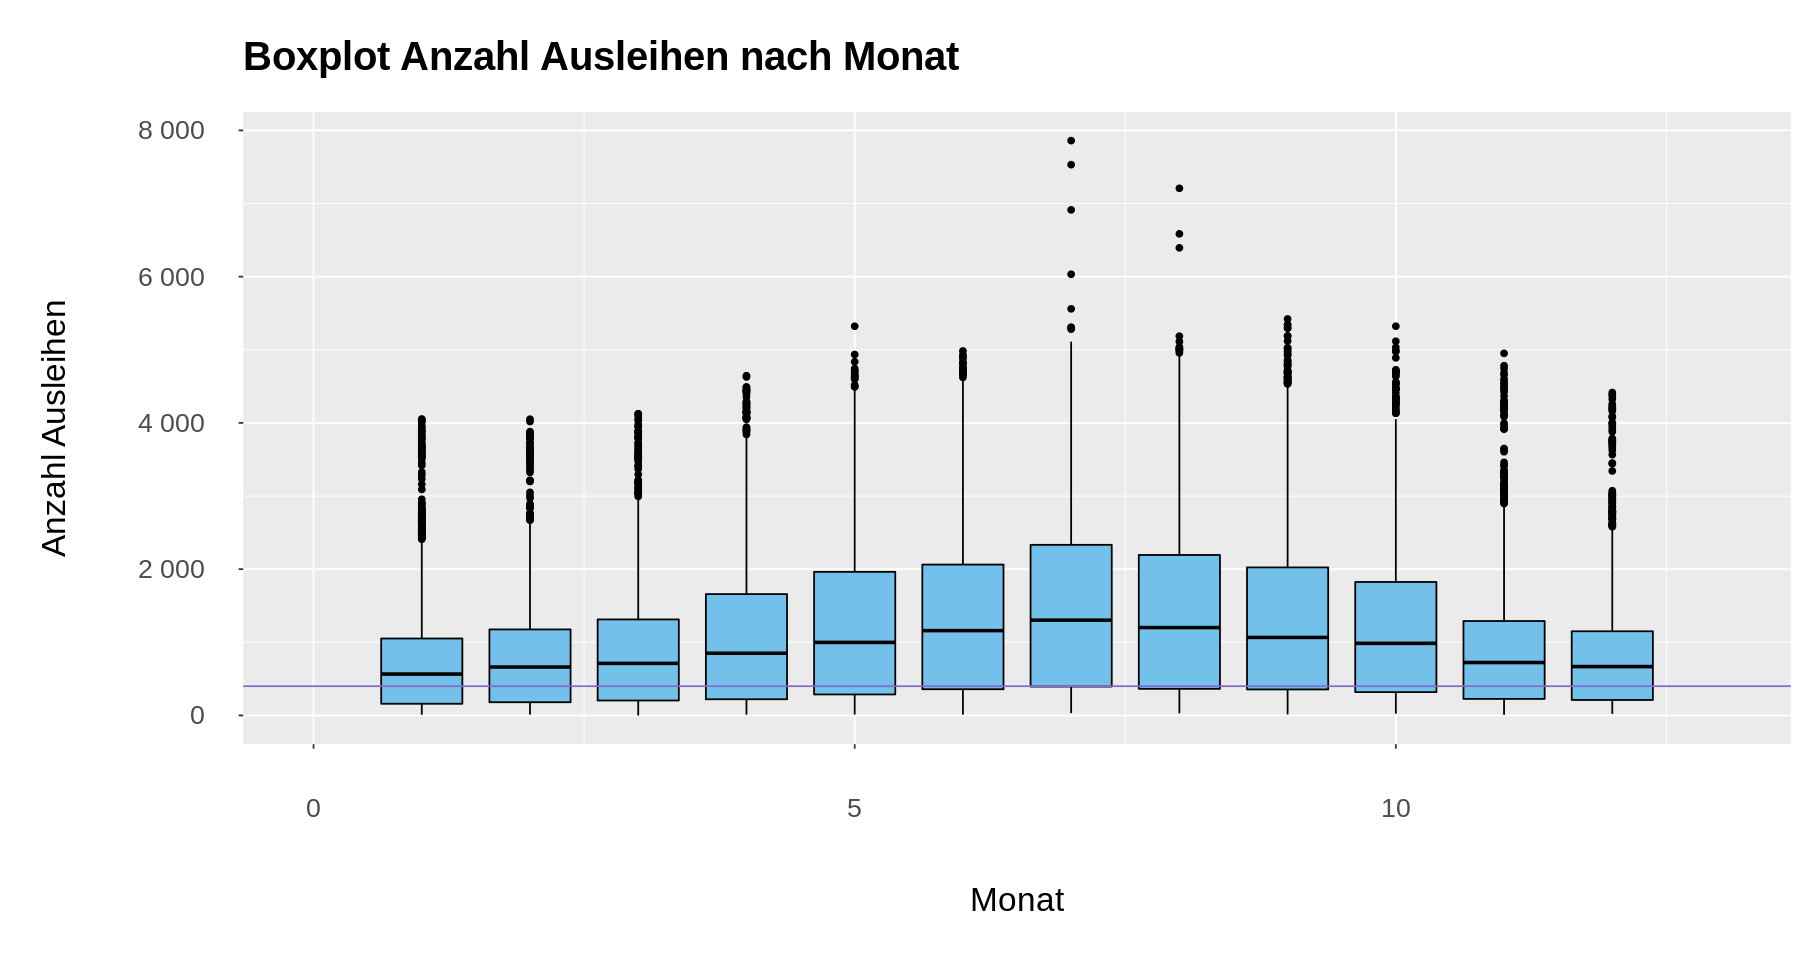

In [30]:
#Boxplot nach Anzahl Ausleihen und Monat, gruppiert nach Monat
ggplot(data = bike_data, aes(month, cnt, group=month)) +
       geom_boxplot(fill="#73c1eb", colour="black") +
xlab("Monat") +
ylab("Anzahl Ausleihen") +
coord_cartesian(xlim = c(0, 13)) +
scale_y_continuous(labels = number_format()) +
ggtitle("Boxplot Anzahl Ausleihen nach Monat") +
geom_hline(yintercept = 400, color = "mediumpurple3", size = 0.5) +


#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      plot.title = element_text(face="bold" , margin = margin(t = 20, r = 0, b = 20, l = 0))
      )